In [ ]:


from jax import random
import matplotlib.pyplot as plt
import cvxpy as cp
import numpy as np

from sklearn.preprocessing import minmax_scale
from sklearn.datasets import load_breast_cancer


from jax import jacfwd, jacrev
from jax.numpy import linalg
from numpy import nanargmin,nanargmax
from scipy.optimize import minimize


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

In [ ]:
pip install numdifftools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 9.4 MB/s eta 0:00:00


In [ ]:
import numdifftools as nd

In [ ]:
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)

In [ ]:
X_s = X[:80,:]
X_s  = minmax_scale(X_s)
Y_s = y[:80,]
Y_s = np.reshape(Y_s,newshape=(80,))

In [ ]:
def sigmoid(x):
  return 0.5 * (np.tanh(x / 2) + 1)

def predict(X,W):
  term = np.dot(X, W)
  return sigmoid(term)

def s1(x):
  return np.exp(x)

def s2(x):
  return (np.exp(2*x))/(1 + np.exp(x))


In [ ]:
def loss(X,Y,W):
  W = np.reshape(W,newshape=(2,))
  preds = predict(X,W)
  label_probs = -Y*np.log(preds) - (1 - Y)*np.log(1 - preds)
  return np.mean(label_probs)

q = lambda W: loss(X_s,Y_s,W)

In [ ]:

W = np.random.normal(scale=0.3,size=(2,))
W6 = np.random.normal(scale=0.3,size=(2,))
W66 = np.random.normal(scale=0.3,size=(2,))
W666 = np.random.normal(scale=0.3,size=(2,))
W06 = np.random.normal(scale=0.3,size=(2,))
W066 = np.random.normal(scale=0.3,size=(2,))
W0666 = np.random.normal(scale=0.3,size=(2,))
W006 = np.random.normal(scale=0.3,size=(2,))
W0066 = np.random.normal(scale=0.3,size=(2,))
W00666 = np.random.normal(scale=0.3,size=(2,))
W7 = np.random.normal(scale=0.3,size=(2,))
W77 = np.random.normal(scale=0.3,size=(2,))
W777 = np.random.normal(scale=0.3,size=(2,))
W7777 = np.random.normal(scale=0.3,size=(2,))
W77777 = np.random.normal(scale=0.3,size=(2,))


results1=[]
results01=[]
results6=[]
results66=[]
results666=[]
results06=[]
results066=[]
results0666=[]
results006=[]
results0006=[]
results0066=[]
results00066=[]
results7=[]
results77=[]
results077=[]
results777=[]
results0777=[]
results7777=[]
results77777=[]
results028 = []
for epoch in range(1000):
  W= W- nd.Gradient(q)(W)
  W6= W6 - (0.5)*nd.Gradient(q)(W6)
  W66= W66 - (5.1)*nd.Gradient(q)(W66)
  W666= W666 - (19.1)*nd.Gradient(q)(W666)
  W7= W7- 0.1*nd.Gradient(q)(W7)
  W77= W77- 2.1*nd.Gradient(q)(W77)
  W777= W777- 8.1*nd.Gradient(q)(W777)
  W7777= W7777- 22.1*nd.Gradient(q)(W7777)
  W77777= W77777- 12.1*nd.Gradient(q)(W77777)
  results1.append(q(W))
  results006.append(q(W006))
  results0066.append(q(W0066))
  results6.append(q(W6))
  results66.append(q(W66))
  results666.append(q(W666))
  results7.append(q(W7))
  results77.append(q(W77))
  results777.append(q(W777))
  results7777.append(q(W7777))
  results77777.append(q(W77777))


In [ ]:
p = 0.5
def g(W):
  return np.mean(p*( 1 + s1(np.dot(X_s,W))+s2(np.dot(X_s,W))) + p*(1-Y_s))


def convexify(W,W0):
  gra = nd.Gradient(g)(W0)
  return np.dot(gra, W-W0) + g(W0)

def f(W,W0):
  return g(W) + q(W) - convexify(W,W0)

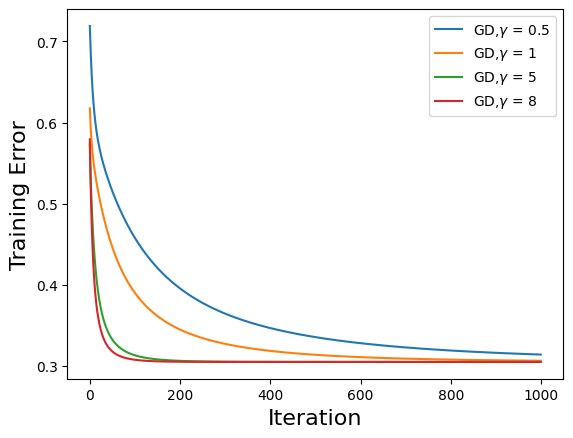

In [ ]:
plt.plot( results6, label="GD,$\gamma$ = 0.5")
plt.plot( results1, label="GD,$\gamma$ = 1")
plt.plot( results66, label="GD,$\gamma$ = 5")
plt.plot( results777, label="GD,$\gamma$ = 8")

##plt.plot( results1, label="GD$\gamma$ = 1")
#plt.plot( results77, label="GD,$\gamma$ = 2")
#plt.plot( results77777, label="GD,$\gamma$ = 12")
#plt.plot( results666, label="GD,$\gamma$ = 19")
#plt.plot( results7777, label="GD,$\gamma$ = 22")

plt.xlabel(r"Iteration", fontsize=16)
#plt.xticks(x,values)
plt.ylabel(r"Training Error", fontsize=16)
plt.title("")
plt.legend(loc="upper right")
plt.style.use('ggplot')
plt.savefig('books_read.png')
plt.show()

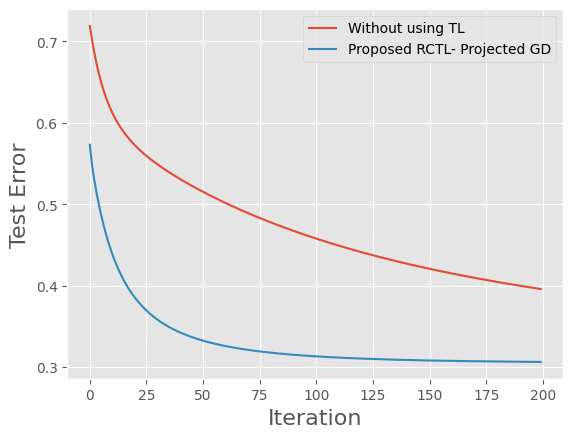

In [ ]:
plt.plot( results6[:200], label="Without using TL")

plt.plot( results66[:200], label="Proposed RCTL- Projected GD")


##plt.plot( results1, label="GD$\gamma$ = 1")
#plt.plot( results77, label="GD,$\gamma$ = 2")
#plt.plot( results77777, label="GD,$\gamma$ = 12")
#plt.plot( results666, label="GD,$\gamma$ = 19")
#plt.plot( results7777, label="GD,$\gamma$ = 22")

plt.xlabel(r"Iteration", fontsize=16)
#plt.xticks(x,values)
plt.ylabel(r"Test Error", fontsize=16)
plt.title("")
plt.legend(loc="upper right")
plt.style.use('ggplot')
plt.savefig('books_read.png')
plt.show()

In [ ]:
results2 = []
results02 = []
W0 = np.random.normal(scale=0.3,size=(2,))
def K(W): return f(W,W0)
# K = lambda W: f(W,W0?)
J = nd.Gradient(K)
l = np.random.normal(scale=0.3,size=(2,))

for epoch in range(100):
  res = minimize(K, l, method='BFGS', jac=J, options={'disp': True})
  W0 = res.x
  print(W0)
  print('epoch=',epoch)
  results2.append(q(res.x))
print('results2=',results2)

Optimization terminated successfully.
         Current function value: 0.654441
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
[-0.70619633  0.60005112]
epoch= 0
Optimization terminated successfully.
         Current function value: 0.542638
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
[-1.67417416  1.59369432]
epoch= 1
Optimization terminated successfully.
         Current function value: 0.460734
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
[-2.6255046   2.47450232]
epoch= 2
Optimization terminated successfully.
         Current function value: 0.409857
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
[-3.45525384  3.19904605]
epoch= 3
Optimization terminated successfully.
         Current function value: 0.381781
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
[

KeyboardInterrupt: ignored

In [ ]:
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [ ]:
class SimpleNet(nn.Module):
  def __init__(self, input_features):
    super().__init__()

    self.layer =  nn.Sequential(nn.Linear(input_features, 1, bias=False), nn.Sigmoid())

  def forward(self, x):
    return self.layer(x)


In [ ]:

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_s, dtype=torch.float32)
y_train = torch.tensor(Y_s, dtype=torch.float32)

# X_test = torch.tensor(X_test, dtype=torch.float32)
# y_test = torch.tensor(y_test, dtype=torch.float32)

# Create TensorDatasets for the training and test sets
train_dataset = TensorDataset(X_train, y_train)
# test_dataset = TensorDataset(X_test, y_test)

# Create DataLoaders for the training and test sets
# test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
## SGD
batch_size = 80
num_epochs = 100
input_features = 2


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
model = SimpleNet(input_features=input_features)
optimizer = optim.SGD(model.parameters(), lr=1)
sgd_loss = []
criterion = nn.BCELoss()

for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        labels = labels.view(-1, 1)
        # Clear the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Append the current loss to the loss list
        sgd_loss.append(loss.item())

In [ ]:
## ADAM
batch_size = 80
num_epochs = 100
input_features = 2


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
model = SimpleNet(input_features=input_features)
optimizer = optim.Adam(model.parameters(), lr=1)
adam_loss = []
criterion = nn.BCELoss()

for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        labels = labels.view(-1, 1)
        # Clear the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Append the current loss to the loss list
        adam_loss.append(loss.item())

In [ ]:
plt.plot(adam_loss, label='adam')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend(loc="upper right")
plt.savefig('books_read.png')
plt.show()

In [ ]:
plt.plot( results2, label="DCA")
plt.plot( results66, label="GD,$\gamma$ = 5")
plt.plot( results777, label="GD,$\gamma$ = 8")
plt.plot(sgd_loss, label="SGD Optimizer")
plt.plot(adam_loss, label="Adam Optimizer")

#plt.plot( results6, label="GD,$\gamma$ = 0.5")
##plt.plot( results1, label="GD$\gamma$ = 1")
#plt.plot( results77, label="GD,$\gamma$ = 2")
#plt.plot( results0777, label="GD Test,$\gamma$ = 8")
##plt.plot( results77777, label="GD,$\gamma$ = 12")
#plt.plot( results666, label="GD,$\gamma$ = 19")

plt.xlabel(r"Iteration", fontsize=16)
#plt.xticks(x,values)
plt.ylabel(r"Training Error", fontsize=16)
plt.title("")
plt.legend(loc="upper right")
plt.style.use('ggplot')
plt.savefig('books_read.png')
plt.show()

In [ ]:
mu = 1/1000

def prox_g(W,W0):
  return g(W) + 0.5*((mu)**2)*np.dot(W-W0, W-W0)

def f(W,W0):
  return prox_g(W,W0) + q(W) - convexify(W,W0)

In [ ]:
results0002 = []
W0 = np.random.normal(scale=0.3,size=(2,))
K = lambda W: f(W,W0)
J = nd.Gradient(K)
l = np.random.normal(scale=0.3,size=(2,))

for epoch in range(10):
  res = minimize(K, l, method='BFGS', jac=J, options={'disp': True})
  W0 = res.x
  print(W0)
  print('epoch=',epoch)
  results0002.append(q(res.x))
print('results0002=',results0002)

In [ ]:
plt.plot( results2, label="DCA")
plt.plot( results0002, label="DC-Prox")
plt.plot( results6, label="GD,$\gamma$ = 0.5")
plt.plot( results1, label="GD,$\gamma$ = 1")
plt.plot( results77, label="GD,$\gamma$ = 2")
plt.plot( results66, label="GD,$\gamma$ = 5")
##plt.plot( results1, label="GD$\gamma$ = 1")
#plt.plot( results777, label="GD,$\gamma$ = 8")
##plt.plot( results77777, label="GD,$\gamma$ = 12")
#plt.plot( results666, label="GD,$\gamma$ = 19")

plt.xlabel(r"Iteration", fontsize=16)
#plt.xticks(x,values)
plt.ylabel(r"Training Error", fontsize=16)
plt.title("")
plt.legend(loc="upper right")
plt.style.use('ggplot')
plt.savefig('books_read.png')
plt.show()

In [ ]:
results002 = []
W0 = np.random.normal(scale=0.3,size=(2,))

J = nd.Gradient(K)
W1 = np.random.normal(scale=0.3,size=(2,))

for i in range(10):
  for j in range(10):
    K = lambda W: f(W,W0)
    W1= W1- 1*nd.Gradient(K)(W1)
  W0 = W1
  print('epoch=',i)
  print(q(W1))
  results002.append(q(W1))
print('results2=',results002)

In [ ]:
plt.plot( results2[:10], label="DCA")
plt.plot( results0002[:10], label="DC-Prox")
plt.plot( results002[:10], label="DC-GD")
plt.plot( results77[:10], label="GD,$\gamma$ = 2")
plt.plot( results66[:10], label="GD,$\gamma$ = 5")

#plt.plot( results6[:10], label="GD,$\gamma$ = 0.5")
#plt.plot( results1[:10], label="GD,$\gamma$ = 1")
#plt.plot( results777[:10], label="GD,$\gamma$ = 8")
##plt.plot( results77777, label="GD,$\gamma$ = 12")
#plt.plot( results666[:20], label="GD,$\gamma$ = 19")


plt.xlabel(r"Iteration", fontsize=16)
#plt.xticks(x,values)
plt.ylabel(r"Training Error", fontsize=16)
plt.title("")
plt.legend(loc="upper right")
plt.style.use('ggplot')
plt.savefig('books_read.png')
plt.show()